# Latent Dirichlet Allocation

In [5]:
#Import gensim, our library for text analysis
import gensim
from gensim.parsing.preprocessing import STOPWORDS
from gensim.corpora.dictionary import Dictionary
from sklearn.feature_extraction.text import CountVectorizer

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim 

# Import usual data analysis tools: pandas, matplotlib, and numpy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import pickle

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning);

import os

In [6]:
data_words_bigrams = pd.read_pickle('scied_words_bigrams_V5.pkl')

In [7]:
from helpers import plot_freq_dist,get_top_n_words,plot_words_freq

Total words: 11673326, unique words: 200776


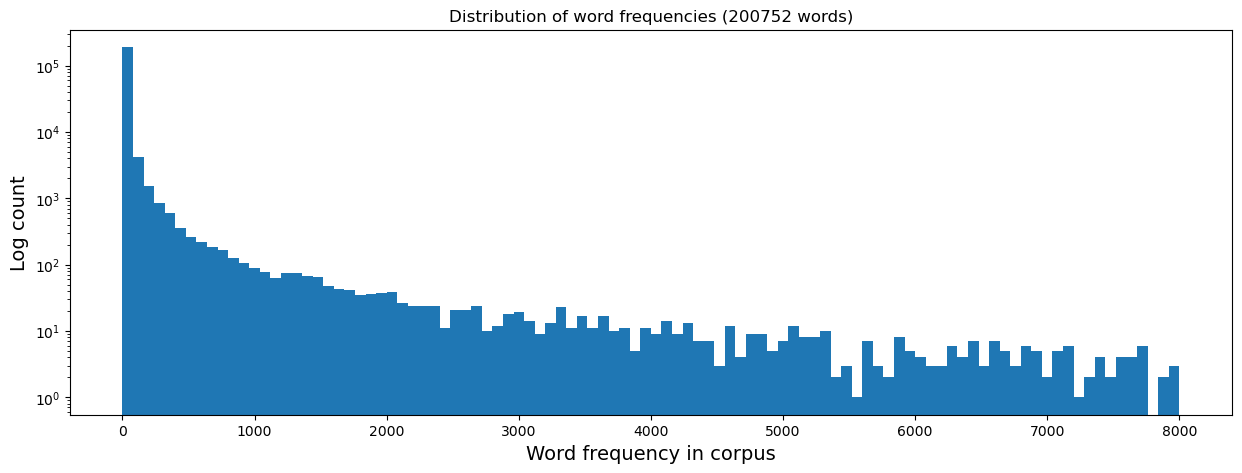

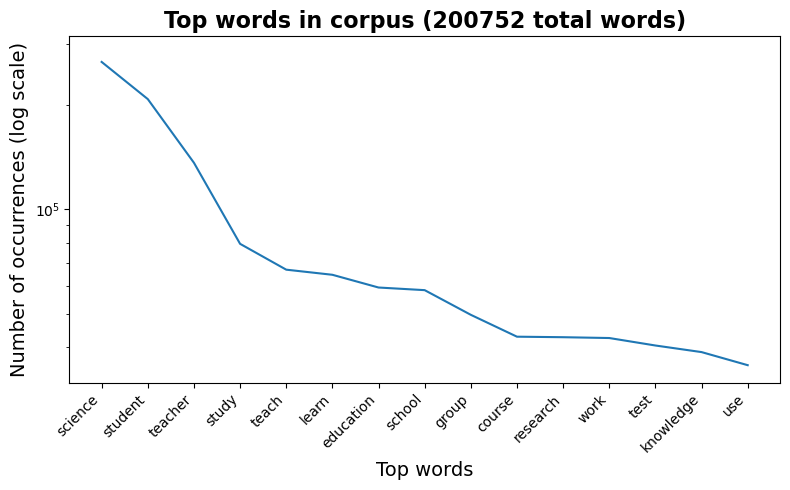

In [8]:
corpus = [ w for doc in data_words_bigrams for w in doc ]
print('Total words: \033[1m%d\033[0m, unique words: \033[1m%d\033[0m' % (len(corpus), len(set(corpus))))

[words, freq, ids] = get_top_n_words(corpus, n_top_words=None)
fig = plot_freq_dist(freq, range=[0,8000])
fig, ax = plot_words_freq(words, freq, 15)

Create Gensim dictionary
`len(id2word)` = `len(corpus)` from above

In [9]:
no_below = 15 # keep tokens which are contained in at least 15 documents
no_above = 0.5 # remove tokens that are contained in more than 50% of the documents 

id2word = gensim.corpora.Dictionary(data_words_bigrams)
id2word.filter_extremes(no_below=no_below, no_above=no_above, keep_n=100000)

In [10]:
type(id2word)

gensim.corpora.dictionary.Dictionary

In [11]:
#Create BoW
bow_corpus = [id2word.doc2bow(doc) for doc in data_words_bigrams]

In [12]:
type(bow_corpus)

list

In [13]:
print(len(bow_corpus)) # number of documents

5577


In [14]:
num_topics = 23
lda_model = gensim.models.LdaModel(corpus=bow_corpus, 
                                   id2word=id2word, 
                                   num_topics=num_topics,
                                   alpha='auto',
                                   random_state=29, 
                                   iterations=15, passes=50)

num_words-top words that best represent each topic (proportion of the word represented in th topic)

In [15]:
lda_model.show_topics(num_words=10, num_topics = num_topics)

[(0,
  '0.018*"achievement" + 0.016*"stem" + 0.013*"variable" + 0.013*"girl" + 0.013*"model" + 0.011*"mathematics" + 0.010*"gender" + 0.010*"female" + 0.009*"grade" + 0.009*"woman"'),
 (1,
  '0.052*"book" + 0.038*"text" + 0.030*"textbook" + 0.025*"author" + 0.021*"chapter" + 0.017*"reading" + 0.014*"reader" + 0.010*"review" + 0.010*"new_york" + 0.010*"page"'),
 (2,
  '0.017*"light" + 0.014*"experiment" + 0.012*"water" + 0.012*"observation" + 0.009*"color" + 0.008*"explanation" + 0.007*"go" + 0.007*"observe" + 0.006*"answer" + 0.006*"look"'),
 (3,
  '0.012*"talk" + 0.010*"discourse" + 0.010*"language" + 0.009*"identity" + 0.008*"interaction" + 0.007*"context" + 0.007*"community" + 0.007*"participant" + 0.005*"action" + 0.005*"engage"'),
 (4,
  '0.192*"child" + 0.023*"age" + 0.016*"grade" + 0.014*"object" + 0.010*"parent" + 0.009*"interview" + 0.008*"elementary_school" + 0.008*"year_old" + 0.008*"response" + 0.007*"adult"'),
 (5,
  '0.038*"exhibit" + 0.033*"museum" + 0.026*"visitor" + 0.

In [17]:
# Compute Coherence Score
coherence_lda = gensim.models.CoherenceModel(model=lda_model, 
                                             texts=data_words_bigrams, 
                                             dictionary=id2word, 
                                             coherence='c_v',
                                             topn=20).get_coherence()
print('\nCoherence Score: ', coherence_lda)



Coherence Score:  0.5228181280622161


In [33]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, id2word, n_jobs=1) 
pyLDAvis.display(vis)